**Data Science Project: Analyzing Key Factors Influencing US Home Prices**

---

***Introduction***

> The data for this analysis was collected from various publicly available sources, focusing on key factors believed to influence home prices in the United States. Using techniques such as VLOOKUP and HLOOKUP in Excel, the collected data was merged to create a comprehensive dataset. This dataset is now imported into this Colab notebook for further analysis and exploration.



***Objective***


> The primary objective of this data science project is to build a predictive model that explains how different factors have impacted home prices in the United States over the last two decades (20 years). The analysis will revolve around understanding the relationship between various economic, demographic, and housing market indicators and the fluctuations in home prices.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv("/content/Assignment_1.csv")

In [4]:
df.head(1)

,date,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population
0,01-01-1947,NaN,NaN,NaN,NaN,NaN,15248,NaN


In [5]:
df.tail(1)

,date,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population
921,01-10-2023,1410.0,3.9,5.33,16848.7,311.175,67083,83.084


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
new_constructed_units,670.0,1396.762687,358.271084,520.000,1190.00000,1396.000,1641.7500,2299.000
unemployment_rate,910.0,5.709670,1.708239,2.500,4.40000,5.500,6.7000,14.700
interest_rates,832.0,4.599916,3.596581,0.050,1.79000,4.160,6.2425,19.100
income,778.0,8255.129820,4299.805894,2318.400,4539.62500,7282.850,12069.1750,20422.600
home_price_index,442.0,142.293441,61.649943,63.965,82.25075,141.275,179.0250,311.175
per_capita_gdp,922.0,37430.843818,15402.352634,15032.000,24176.75000,35582.000,52835.0000,67083.000
urban_population,766.0,76.764057,3.788336,69.996,73.65550,75.701,80.2690,83.084


In [7]:
df.nunique()

date                     922
new_constructed_units    536
unemployment_rate         83
interest_rates           503
income                   777
home_price_index         440
per_capita_gdp           307
urban_population          63
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   922 non-null    object 
 1   new_constructed_units  670 non-null    float64
 2   unemployment_rate      910 non-null    float64
 3   interest_rates         832 non-null    float64
 4   income                 778 non-null    float64
 5   home_price_index       442 non-null    float64
 6   per_capita_gdp         922 non-null    int64  
 7   urban_population       766 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 57.8+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   922 non-null    datetime64[ns]
 1   new_constructed_units  670 non-null    float64       
 2   unemployment_rate      910 non-null    float64       
 3   interest_rates         832 non-null    float64       
 4   income                 778 non-null    float64       
 5   home_price_index       442 non-null    float64       
 6   per_capita_gdp         922 non-null    int64         
 7   urban_population       766 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 57.8 KB


In [11]:
df.head(1)

,date,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population
0,1947-01-01,NaN,NaN,NaN,NaN,NaN,15248,NaN


In [12]:
df_20 = df[(df["date"] >= '01-01-2003') & (df["date"] <= '01-10-2023')]

In [13]:
df_20.head(1)

,date,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population
672,2003-01-01,1654.0,5.8,1.24,10710.4,128.461,50462,79.583


In [14]:
df_20.tail(1)

,date,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population
921,2023-01-10,1410.0,3.9,5.33,16848.7,311.175,67083,83.084


In [15]:
df_20.isnull().sum()

date                     0
new_constructed_units    0
unemployment_rate        0
interest_rates           0
income                   0
home_price_index         0
per_capita_gdp           0
urban_population         0
dtype: int64

There are no Null Values on our dataset.

In [16]:
df_20.duplicated().sum()

0

There are no Duplicate columns present in our dataset.

In [17]:
df_20.nunique()

date                     250
new_constructed_units    228
unemployment_rate         64
interest_rates           118
income                   250
home_price_index         249
per_capita_gdp            83
urban_population          20
dtype: int64

Above info shows that there are no categorical variables present in the dataset.

In [18]:
df_20['year'] = df_20['date'].dt.year

<ipython-input-18-b94521149b84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['year'] = df_20['date'].dt.year


Creating a new variable "Year" to make Year wise Analysis for the variables.

In [19]:
df_20.head()

,date,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population,year
672,2003-01-01,1654.0,5.8,1.24,10710.4,128.461,50462,79.583,2003
673,2003-01-02,1688.0,5.9,1.26,10674.0,129.355,50462,79.583,2003
674,2003-01-03,1638.0,5.9,1.25,10696.5,130.148,50462,79.583,2003
675,2003-01-04,1662.0,6.0,1.26,10752.7,130.884,50796,79.583,2003
676,2003-01-05,1733.0,6.1,1.26,10832.0,131.735,50796,79.583,2003


In [20]:
pd.set_option('display.max_columns',None)
df_20.groupby('year')['new_constructed_units','unemployment_rate','interest_rates','income','home_price_index','per_capita_gdp','urban_population'].agg(['mean', 'max', 'min']).T


<ipython-input-20-7ada3471925c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_20.groupby('year')['new_constructed_units','unemployment_rate','interest_rates','income','home_price_index','per_capita_gdp','urban_population'].agg(['mean', 'max', 'min']).T


year                                2003          2004          2005  \
new_constructed_units mean   1676.750000   1834.583333   1929.333333   
                      max    1733.000000   1938.000000   2103.000000   
                      min    1570.000000   1709.000000   1787.000000   
unemployment_rate     mean      5.991667      5.541667      5.083333   
                      max       6.300000      5.800000      5.400000   
                      min       5.700000      5.400000      4.900000   
interest_rates        mean      1.127500      1.349167      3.213333   
                      max       1.260000      2.160000      4.160000   
                      min       0.980000      1.000000      2.280000   
income                mean  10884.391667  11233.175000  11364.858333   
                      max   11066.700000  11659.000000  11535.200000   
                      min   10674.000000  11051.200000  11226.500000   
home_price_index      mean    133.731333    150.440250    171.737000   
                      max     140.179000    159.330000    180.910000   
                      min     128.461000    141.646000    161.288000   
per_capita_gdp        mean  51189.000000  52681.250000  54014.250000   
                      max   51986.000000  53242.000000  54317.000000   
                      min   50462.000000  52179.000000  53719.000000   
urban_population      mean     79.583000     79.757000     79.928000   
                      max      79.583000     79.757000     79.928000   
                      min      79.583000     79.757000     79.928000   

year                                2006          2007          2008  \
new_constructed_units mean   1989.000000   1513.833333   1126.833333   
                      max    2245.000000   1822.000000   1331.000000   
                      min    1877.000000   1328.000000   1017.000000   
unemployment_rate     mean      4.608333      4.616667      5.800000   
                      max       4.800000      5.000000      7.300000   
                      min       4.400000      4.400000      4.900000   
interest_rates        mean      4.964167      5.019167      1.927500   
                      max       5.250000      5.260000      3.940000   
                      min       4.290000      4.240000      0.160000   
income                mean  11777.783333  12054.300000  12244.325000   
                      max   11958.600000  12120.500000  12696.200000   
                      min   11651.800000  11956.600000  12100.800000   
home_price_index      mean    183.447500    179.918917    164.057417   
                      max     184.364000    184.598000    173.132000   
                      min     182.321000    174.342000    153.619000   
per_capita_gdp        mean  54993.500000  55560.000000  55105.250000   
                      max   55216.000000  55857.000000  55705.000000   
                      min   54886.000000  55260.000000  53941.000000   
urban_population      mean     80.099000     80.269000     80.438000   
                      max      80.099000     80.269000     80.438000   
                      min      80.099000     80.269000     80.438000   

year                                2009          2010          2011  \
new_constructed_units mean    795.500000    653.750000    584.583333   
                      max     846.000000    894.000000    634.000000   
                      min     721.000000    552.000000    520.000000   
unemployment_rate     mean      9.283333      9.608333      8.933333   
                      max      10.000000      9.900000      9.100000   
                      min       7.800000      9.300000      8.500000   
interest_rates        mean      0.160000      0.175000      0.101667   
                      max       0.220000      0.200000      0.170000   
                      min       0.120000      0.110000      0.070000   
income                mean  12273.441667  12505.291667  12775.250000   
                      max   12500.1000



1.  The number of new constructed units has generally increased over the years, with a noticeable peak in 2005 and a subsequent decline until around 2009.
2.  The unemployment rate shows a pattern of decrease from 2003 to 2007, followed by a significant increase during the 2008 financial crisis.
3.  Interest rates have experienced a general decline over the years, reaching a minimum around 2009.
4.  The maximum income has consistently increased, reflecting overall economic growth.



# **Exploratory data analysis (EDA)**

In [21]:
cols =  ['new_constructed_units','unemployment_rate','interest_rates',
         'income','per_capita_gdp','urban_population']

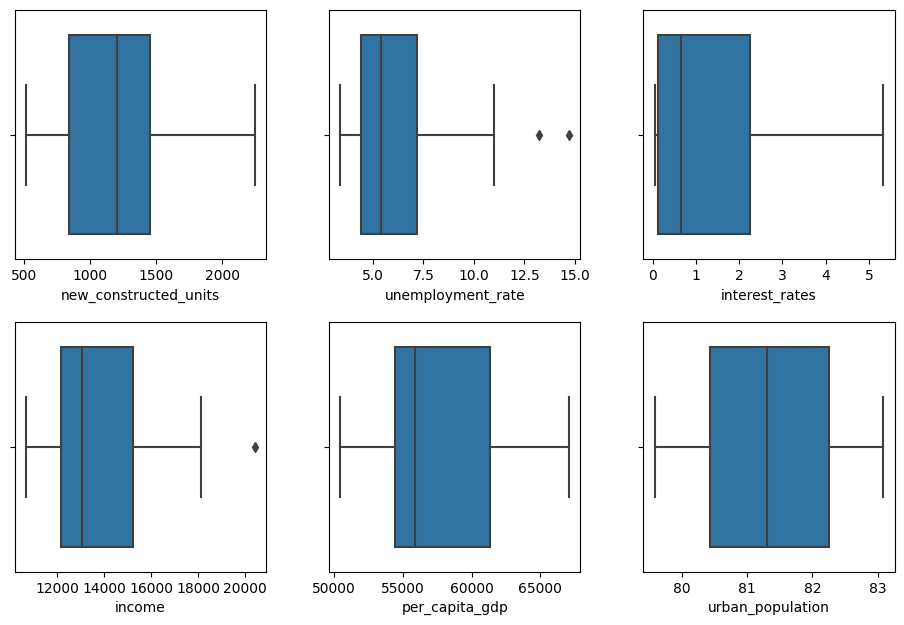

In [22]:
fig = plt.figure(figsize = (60,60))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

ax0 = fig.add_subplot(gs[0,0],)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

Axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(Axis,cols):
    sns.boxplot(ax = ax,data = df_20, x = col)
plt.show()

1. Income has 1 outliers greater than upper bound (19853.34) or lower than lower bound(7509.24). Cap them or remove them.
2. Unemployement Rate has 3 outliers greater than upper bound (11.40) or lower than lower bound(0.20). Cap them or remove them.

So below we are calculating the IQR and on the basis of lower and Upper limit we are capping the outliers.

<Axes: xlabel='income'>

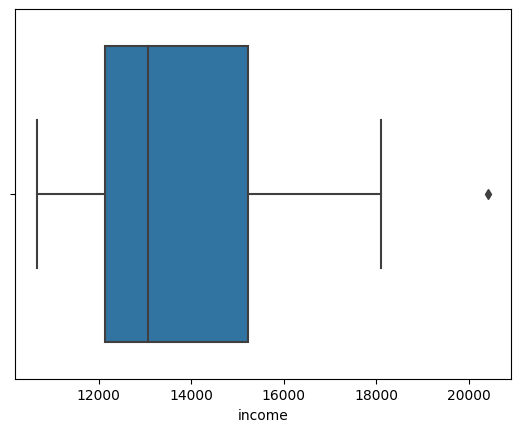

In [23]:
sns.boxplot(data=df_20, x= 'income')

In [24]:
q1_income = df_20['income'].quantile(0.25)
q3_income = df_20['income'].quantile(0.75)
income_IQR = q3_income - q1_income

upper_limit_income = q3_income + 1.5 * income_IQR
lower_limit_income = q1_income - 1.5 * income_IQR

print(upper_limit_income)
print(lower_limit_income)

19853.337499999998
7509.2375


In [25]:
df_20['income'] = df_20['income'].clip(lower=lower_limit_income, upper=upper_limit_income)

<ipython-input-25-2109b2de28d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['income'] = df_20['income'].clip(lower=lower_limit_income, upper=upper_limit_income)


<Axes: xlabel='income'>

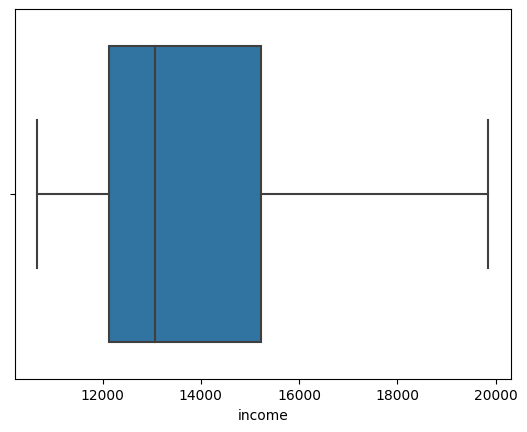

In [26]:
sns.boxplot(data=df_20, x= 'income')

We can see now there are no outliers present in the income data.

<Axes: xlabel='unemployment_rate'>

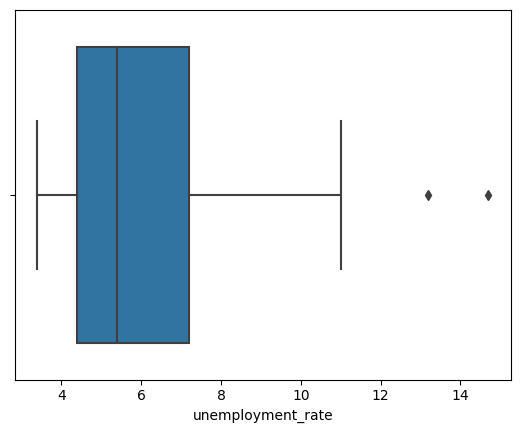

In [27]:
sns.boxplot(data=df_20, x= 'unemployment_rate')

In [28]:
q1_ur = df_20['unemployment_rate'].quantile(0.25)
q3_ur = df_20['unemployment_rate'].quantile(0.75)
ur_IQR = q3_ur - q1_ur

upper_limit_ur = q3_ur + 1.5 * ur_IQR
lower_limit_ur = q1_ur - 1.5 * ur_IQR

print(upper_limit_ur)
print(lower_limit_ur)

11.399999999999999
0.20000000000000107


In [29]:
df_20['unemployment_rate'] = df_20['unemployment_rate'].clip(lower=lower_limit_ur, upper=upper_limit_ur)

<ipython-input-29-d67fd013cfd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['unemployment_rate'] = df_20['unemployment_rate'].clip(lower=lower_limit_ur, upper=upper_limit_ur)


<Axes: xlabel='unemployment_rate'>

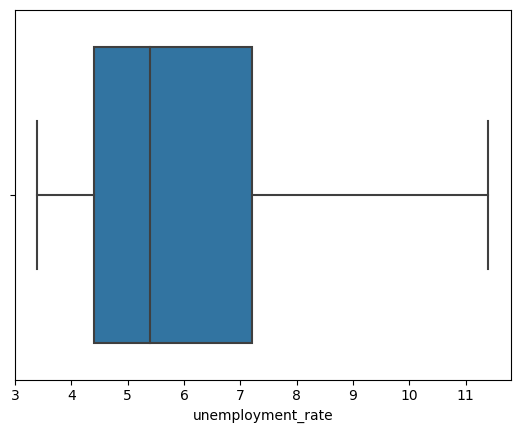

In [30]:
sns.boxplot(data=df_20, x= 'unemployment_rate')

We can see now there are no outliers present in the Unemployemt Rate data.

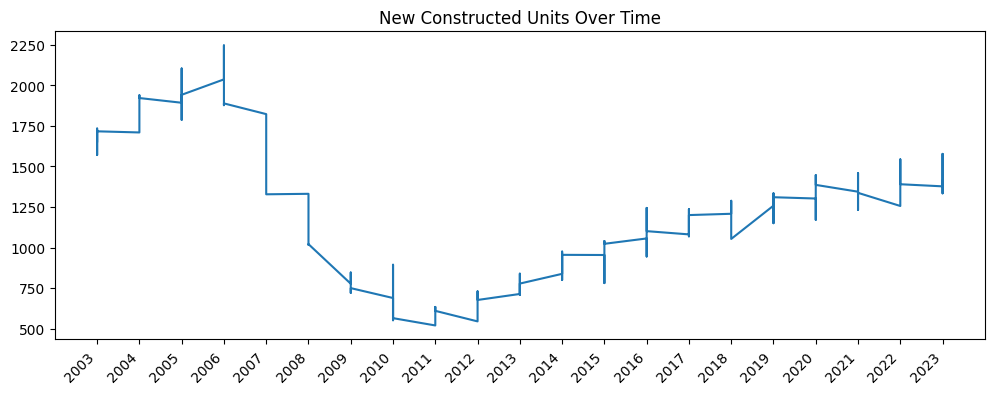

In [31]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['new_constructed_units'])
plt.title("New Constructed Units Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

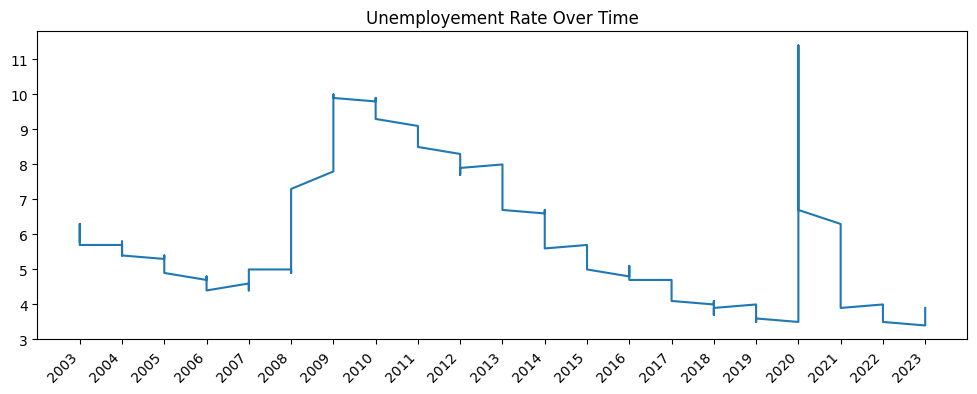

In [32]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['unemployment_rate'])
plt.title("Unemployement Rate Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

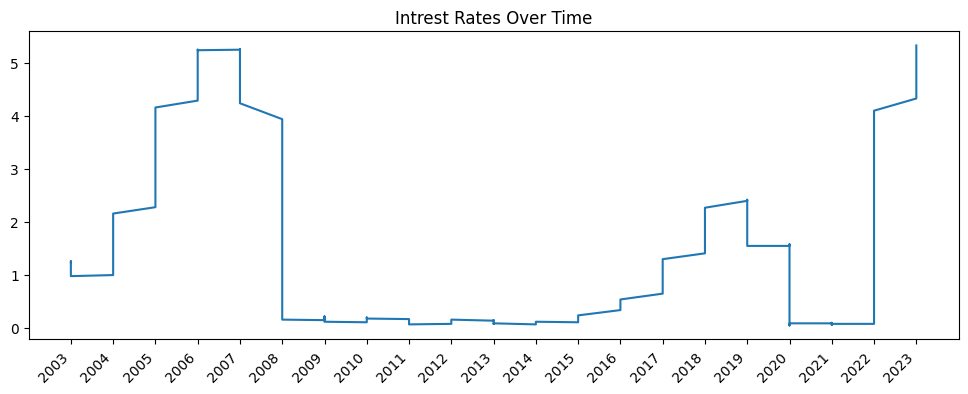

In [33]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['interest_rates'])
plt.title("Intrest Rates Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

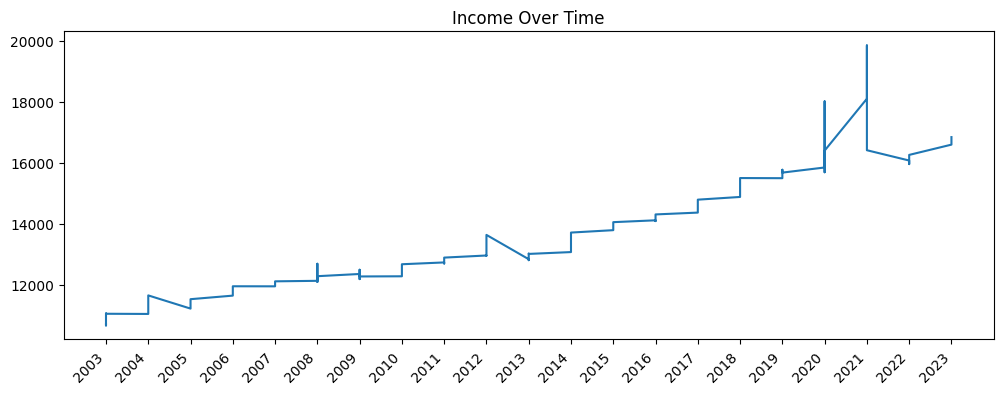

In [34]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['income'])
plt.title("Income Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

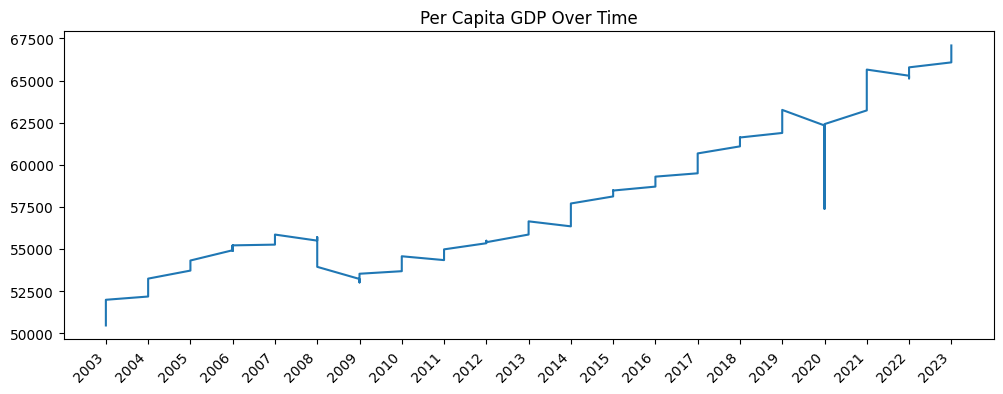

In [35]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['per_capita_gdp'])
plt.title("Per Capita GDP Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

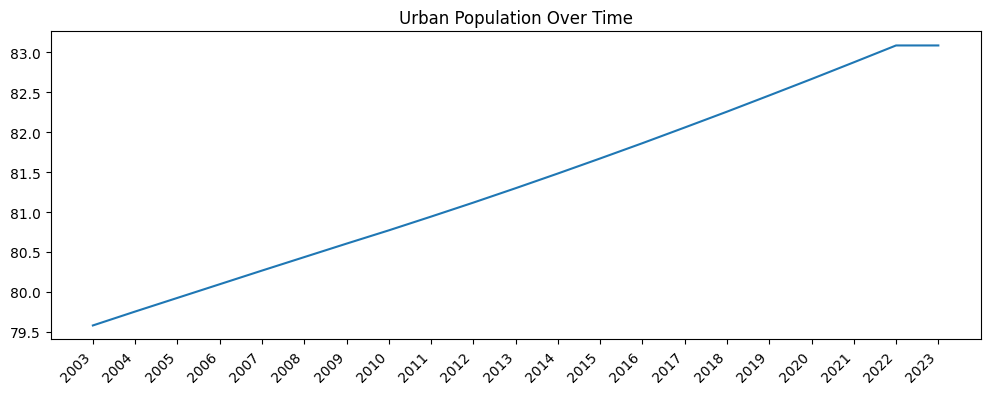

In [36]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['urban_population'])
plt.title("Urban Population Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

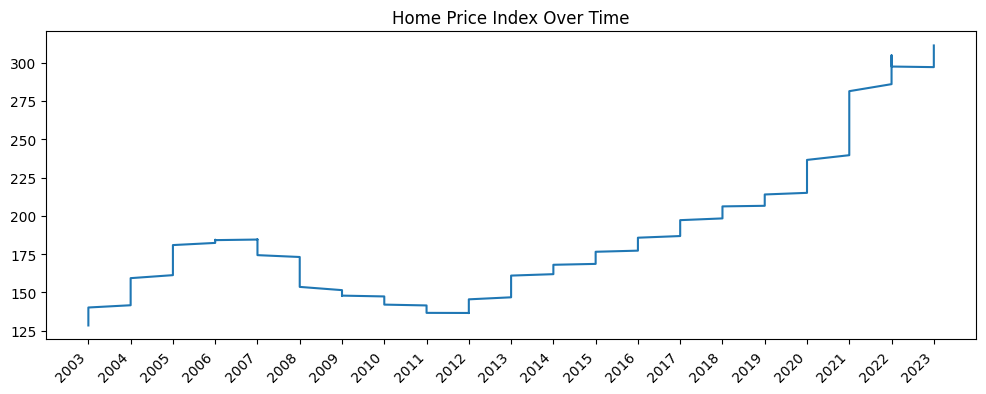

In [37]:
plt.figure(figsize = (12,4))
plt.plot(df_20['year'], df_20['home_price_index'])
plt.title("Home Price Index Over Time")
plt.xticks(df_20['year'].unique(), rotation=45, ha="right")
plt.show()

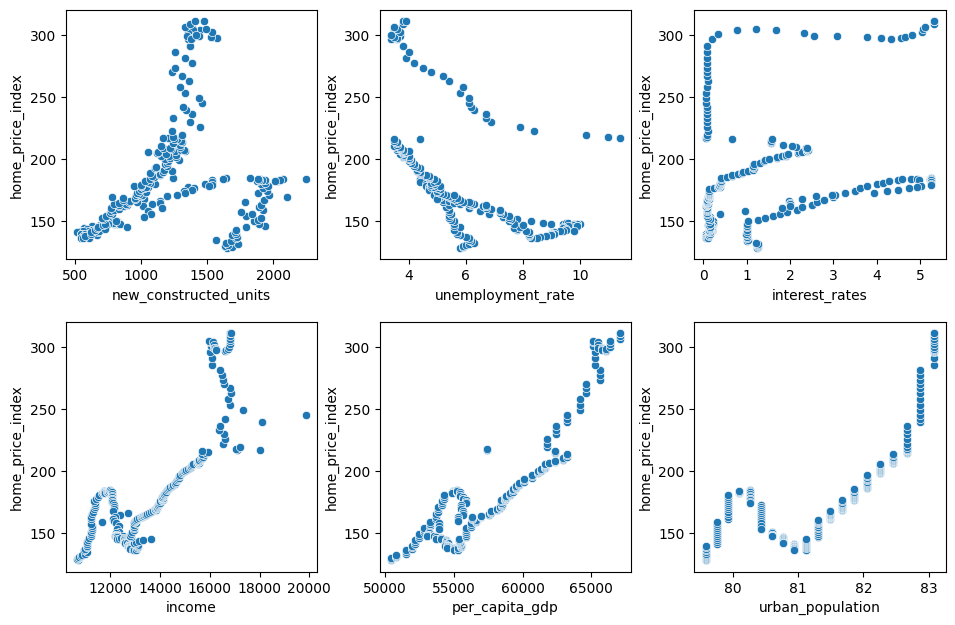

In [38]:
fig = plt.figure(figsize = (60,60))
gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.25,hspace = 0.25)

ax0 = fig.add_subplot(gs[0,0],)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

Axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(Axis,cols):
    sns.scatterplot(df_20, ax=ax ,x = col, y = 'home_price_index')
plt.show()

**"Scatter Plots of Factors vs. Home Price Index"**

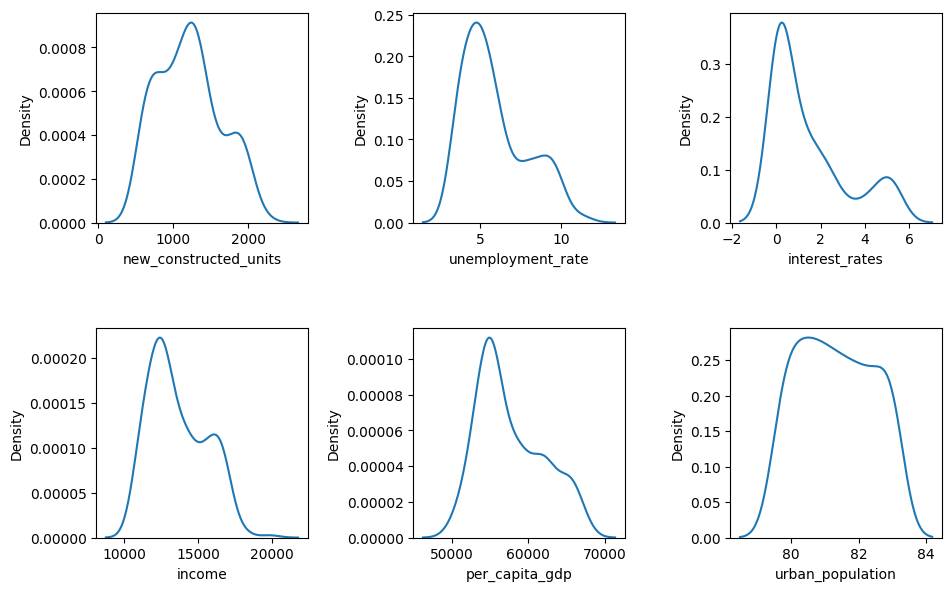

In [39]:
fig = plt.figure(figsize = (60,60))

gs = fig.add_gridspec(15,15)

gs.update(wspace = 0.50,hspace = 0.50)

ax0 = fig.add_subplot(gs[0,0],)
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

Axis = [ax0,ax1,ax2,ax3,ax4,ax5]

for ax,col in zip(Axis,cols):
    sns.kdeplot(df_20, ax=ax ,x = col)
plt.show()

The variables new_constructed_units and urban_population exhibit Normal distributions, while the remaining variables show slight right-skewness. This mild skewness, although present, is deemed acceptable for model building, and we will proceed with our analysis considering these distribution characteristics as Normal.

In [64]:
df.corr()

<ipython-input-64-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,new_constructed_units,unemployment_rate,interest_rates,income,home_price_index,per_capita_gdp,urban_population
new_constructed_units,1.000000,-0.390979,0.418073,-0.411212,-0.062159,-0.376994,-0.418469
unemployment_rate,-0.390979,1.000000,0.066943,-0.046088,-0.231612,0.103897,-0.068268
interest_rates,0.418073,0.066943,1.000000,-0.541979,-0.542286,-0.374240,-0.552013
income,-0.411212,-0.046088,-0.541979,1.000000,0.935364,0.987732,0.986303
home_price_index,-0.062159,-0.231612,-0.542286,0.935364,1.000000,0.943785,0.889301
per_capita_gdp,-0.376994,0.103897,-0.374240,0.987732,0.943785,1.000000,0.990761
urban_population,-0.418469,-0.068268,-0.552013,0.986303,0.889301,0.990761,1.000000


<ipython-input-40-748b961f0c4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_20.corr(),vmax = 1, vmin = -1 , annot = True , cmap = "RdYlGn")


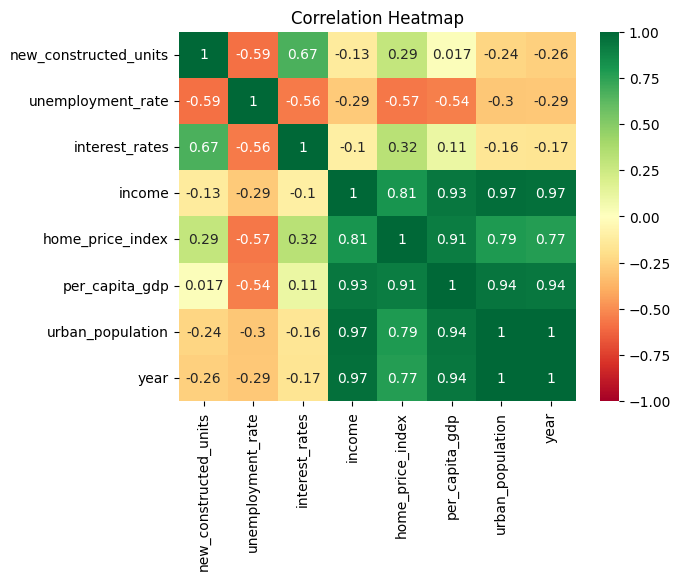

In [40]:
sns.heatmap(df_20.corr(),vmax = 1, vmin = -1 , annot = True , cmap = "RdYlGn")
plt.title("Correlation Heatmap")
plt.show()

The above Heatmap indicates that few of these variables provide similar information, and their high correlation might lead to multicollinearity issues in regression analysis.

# **Standardization**

Standardization is performed on the dataset to bring all features to a common scale. This is crucial when working with machine learning models that are sensitive to the magnitude of input variables.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X = df_20.drop(columns = ['home_price_index','date','year'])
y = df_20["home_price_index"]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.33, random_state=2)

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **MODEL BUILDING**

# **Linear Regression**

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [46]:
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)

In [47]:
r2_lr = r2_score(y_test,lr_pred)
print("R squared Value")
print(r2_score(y_test,lr_pred))
mse_lr = mean_squared_error(y_test,lr_pred)
print("\nMSE")
print(mean_squared_error(y_test,lr_pred))
mae_lr = mean_absolute_error(y_test,lr_pred)
print("\nMAE")
print(mean_absolute_error(y_test,lr_pred))

R squared Value
0.9527354255690559

MSE
119.27608462812941

MAE
7.788883975430829


**R2 Score for LR model indicates 95.27% of the variability in the dependent variable is explained by the model.**

# **Random forest Model**

In [48]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()

In [49]:
rr.fit(X_train_scaled,y_train)
rr_pred = rr.predict(X_test_scaled)

In [50]:
r2_rr = r2_score(y_test,rr_pred)
print("R squared Value")
print( r2_score(y_test,rr_pred))
mse_rr = mean_squared_error(y_test,rr_pred)
print("\nMSE")
print( mean_squared_error(y_test,rr_pred))
mae_rr =  mean_absolute_error(y_test,rr_pred)
print("\nMAE")
print( mean_absolute_error(y_test,rr_pred))

R squared Value
0.9962608494326256

MSE
9.43605744643026

MAE
2.0383102409638623


**R2 Score for RR model indicates 99.65% of the variability in the dependent variable is explained by the model.**

# **ADA BOOST**

In [51]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [52]:
ada.fit(X_train_scaled,y_train)
ada_pred = ada.predict(X_test_scaled)

In [53]:
r2_ab = r2_score(y_test,ada_pred )
print("R squared Value")
print( r2_score(y_test,ada_pred ))
mse_ab = mean_squared_error(y_test,ada_pred )
print("\nMSE")
print( mean_squared_error(y_test,ada_pred ))
mae_ab =  mean_absolute_error(y_test,ada_pred )
print("\nMAE")
print( mean_absolute_error(y_test,ada_pred ))

R squared Value
0.9900592689000133

MSE
25.086261713407538

MAE
3.834583774110322


**R2 Score for ADA Boosting model indicates 98.84% of the variability in the dependent variable is explained by the model.**

# **Gradient Boosting**

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [55]:
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)

In [56]:
r2_gb = r2_score(y_test,gb_pred )
print("R squared Value")
print( r2_score(y_test,gb_pred ))
mse_gb = mean_squared_error(y_test,gb_pred )
print("\nMSE")
print( mean_squared_error(y_test,gb_pred ))
mae_gb =  mean_absolute_error(y_test,gb_pred )
print("\nMAE")
print( mean_absolute_error(y_test,gb_pred ))

R squared Value
0.9947513910680241

MSE
13.245301172974209

MAE
2.6471187223910935


**R2 Score for Gradient Boosting model indicates 99.48% of the variability in the dependent variable is explained by the model.**

# **XG Boosting Model**

In [57]:
from xgboost import XGBRegressor
xg = XGBRegressor()

In [58]:
xg.fit(X_train_scaled, y_train)
xg_pred = xg.predict(X_test_scaled)

In [59]:
r2_xg = r2_score(y_test,xg_pred )
print("R squared Value")
print( r2_score(y_test,xg_pred ))
mse_xg = mean_squared_error(y_test,xg_pred )
print("\nMSE")
print( mean_squared_error(y_test,xg_pred ))
mae_xg =  mean_absolute_error(y_test,xg_pred )
print("\nMAE")
print( mean_absolute_error(y_test,xg_pred ))

R squared Value
0.9953096425659546

MSE
11.836507087496674

MAE
2.3933190462043488


**R2 Score for ADA Boosting model indicates 99.53% of the variability in the dependent variable is explained by the model.**

# **Observation**

Random Forest and XGBoosting consistently outperform other models, demonstrating their effectiveness in capturing the underlying patterns in the data. Below is the graph that shoes the actual and the predicted value for the Ada Boost Algorithmn.

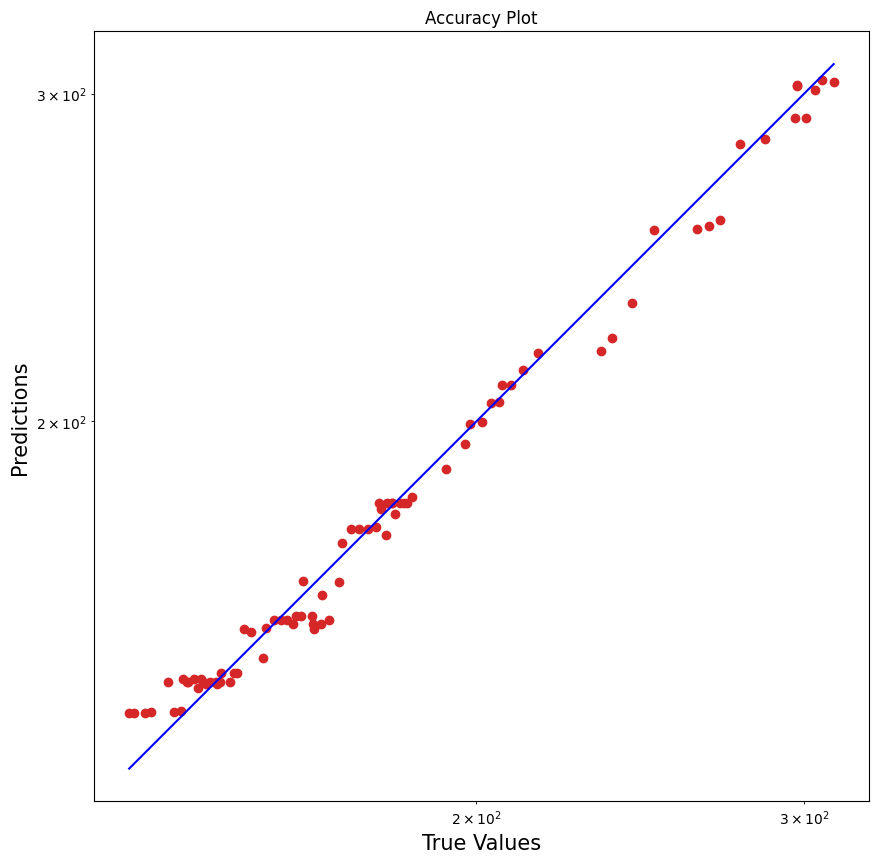

In [63]:
fit_data = ada.fit(X_train_scaled,y_train)
prediction = fit_data.predict(X_test_scaled)

plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c ='#d62728')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()